<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/Ashish_Kashav_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv

--2020-05-15 23:48:51--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘assignment_shala_clustering.csv.1’

assignment_shala_cl 100%[===================>]   3.89K  --.-KB/s    in 0s      

2020-05-15 23:48:51 (52.6 MB/s) - ‘assignment_shala_clustering.csv.1’ saved [3981/3981]



In [0]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import collections
from sklearn.preprocessing import StandardScaler as std

In [0]:
data=pd.read_csv('assignment_shala_clustering.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
data=data.drop('CustomerID',axis=1)

In [6]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


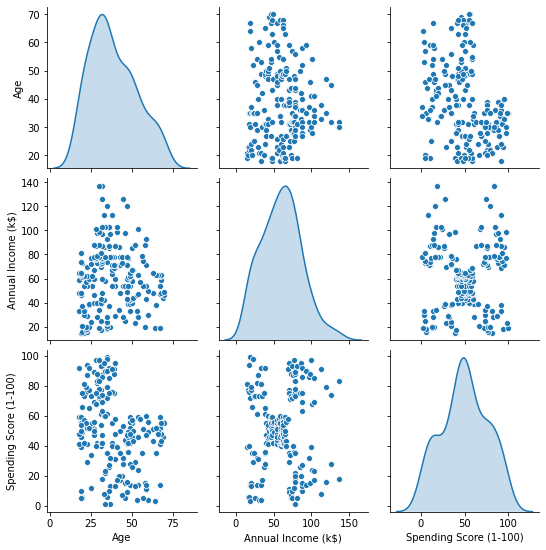

In [8]:
sns.pairplot(data,diag_kind='kde')

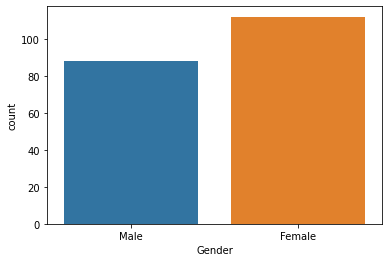

In [9]:
sns.countplot(data['Gender'])

In [0]:
scaler=std()

In [0]:
data=pd.get_dummies(data,columns=['Gender'],drop_first=True)

In [0]:
datascaled=scaler.fit_transform(X=data)

In [57]:
datascaled[:10]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526]])

In [0]:
def clusterMetrics(ind):
  scoresDBIndex=[]
  scoresElbow=[]
  scoresSilhoutte=[]
  if(ind=='K'):
    for i in range(2,10):
      kmeans = KMeans(n_clusters=i, random_state=0).fit(datascaled)
      datafull=np.column_stack((datascaled,kmeans.labels_))
      scoresDBIndex.append(round(davies_bouldin_score(datafull[:,:3],datafull[:,-1]),2))
      scoresElbow.append(round(kmeans.inertia_,2))
      scoresSilhoutte.append(round(silhouette_score(datafull[:,:3],datafull[:,-1]),2))
    return scoresDBIndex,scoresElbow,scoresSilhoutte
  if (ind=='A'):
     dendrogram = sch.dendrogram(sch.linkage(datascaled, method='ward'))
     for i in range(2,10):
      model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
      model.fit(datascaled)
      datafull=np.column_stack((datascaled,model.labels_))
      scoresDBIndex.append(round(davies_bouldin_score(datafull[:,:3],datafull[:,-1]),2))
      scoresSilhoutte.append(round(silhouette_score(datafull[:,:3],datafull[:,-1]),2))
     return scoresDBIndex,scoresSilhoutte
  else:
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(datascaled)
    distances, indices = nbrs.kneighbors(datascaled)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

## 2 can be good number of clusters accoriding to all metrics when k means is used.

In [0]:
scoresDBIndex,scoresElbow,scoresSilhoutte=clusterMetrics('K')

<BarContainer object of 8 artists>

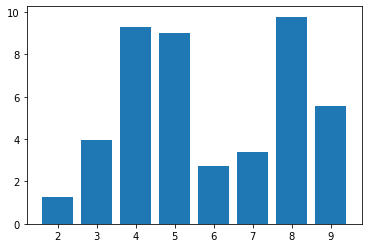

In [18]:
plt.xticks(np.array(range(len(scoresSilhoutte)))+2)
plt.bar(x=np.array(range(len(scoresSilhoutte)))+2,height=scoresDBIndex)

Best score is for the cluster number = 2.

<BarContainer object of 8 artists>

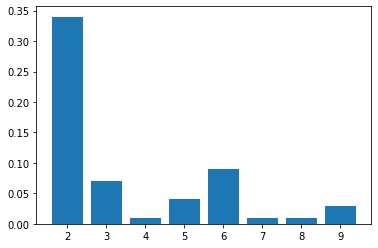

In [19]:
plt.xticks(np.array(range(len(scoresSilhoutte)))+2)
plt.bar(x=np.array(range(len(scoresSilhoutte)))+2,height=scoresSilhoutte)

Best score is for the cluster number = 2.

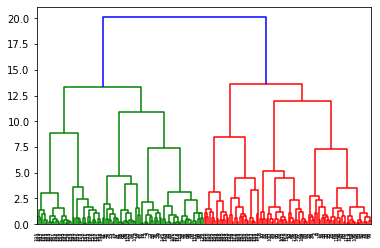

In [20]:
scoresDBIndex,scoresSilhoutte=clusterMetrics('A')

We would be max interested in maximum cutting till 4rth cluster below which it would become too specific.

<BarContainer object of 8 artists>

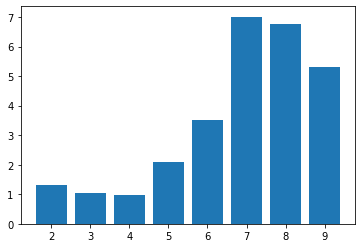

In [21]:
plt.xticks(np.array(range(len(scoresSilhoutte)))+2)
plt.bar(x=np.array(range(len(scoresSilhoutte)))+2,height=scoresDBIndex)

Here number of cluster =2,3 or 4 makes sense.


<BarContainer object of 8 artists>

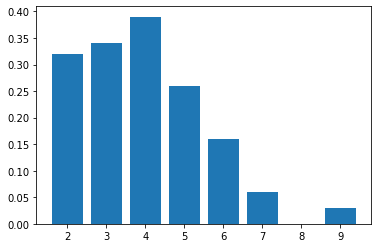

In [22]:
plt.xticks(np.array(range(len(scoresSilhoutte)))+2)
plt.bar(x=np.array(range(len(scoresSilhoutte)))+2,height=scoresSilhoutte)

Similar is the result for silhoutte score too.

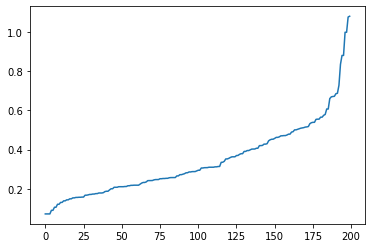

In [23]:
clusterMetrics('D')

Eps seems to be around 0.6 because elbow comes there.
minPts = 2 * dim = 8 but now lets go on with 5 as minpts as 8 will classify many points as noisy points is suggested by the authors as in the paper.
https://link.springer.com/article/10.1023/A:1009745219419

In [25]:
model = DBSCAN(eps=0.6, min_samples=5)
model.fit(datascaled)
collections.Counter(model.labels_)

Counter({-1: 62, 0: 57, 1: 6, 2: 5, 3: 4, 4: 22, 5: 9, 6: 10, 7: 18, 8: 7})

Also, a major limitation of DBSCAN is
that it requires to know the parameters Eps and MinPts, and it uses global parameter
of Eps, so it cannot handle data containing clusters of differing densities, since its
density based definition of core points cannot identify the core points of varying
density clusters.



In [0]:
data['DBSCAN']=model.labels_

In [0]:
data['KNN']=KMeans(n_clusters=2, random_state=0).fit(datascaled).labels_

In [0]:
data['HierarichalClustering']=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(datascaled).labels_

In [29]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,DBSCAN,KNN,HierarichalClustering
0,19,15,39,1,-1,1,1
1,21,15,81,1,1,1,1
2,20,16,6,0,-1,0,0
3,23,16,77,0,0,1,1
4,31,17,40,0,-1,1,0


In [0]:
dt=TSNE(n_iter=5000,perplexity=40,learning_rate=10).fit_transform(datascaled)

In [0]:
sns.set_palette("husl")

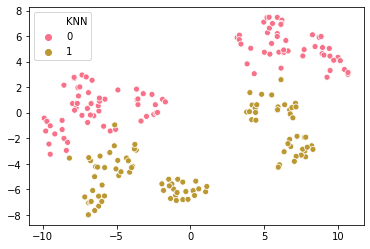

In [43]:
sns.scatterplot(dt[:,0],dt[:,1],hue=data['KNN'])

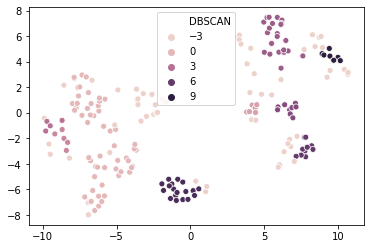

In [46]:
with sns.color_palette("PuBuGn_d"):
    sns.scatterplot(dt[:,0],dt[:,1],hue=data['DBSCAN'])

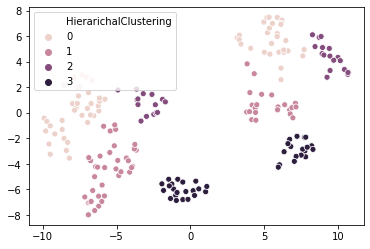

In [41]:
sns.scatterplot(dt[:,0],dt[:,1],hue=data['HierarichalClustering'])

We can use the TSNE plots by changing parameters and confirm the veracity of other clustering algos.

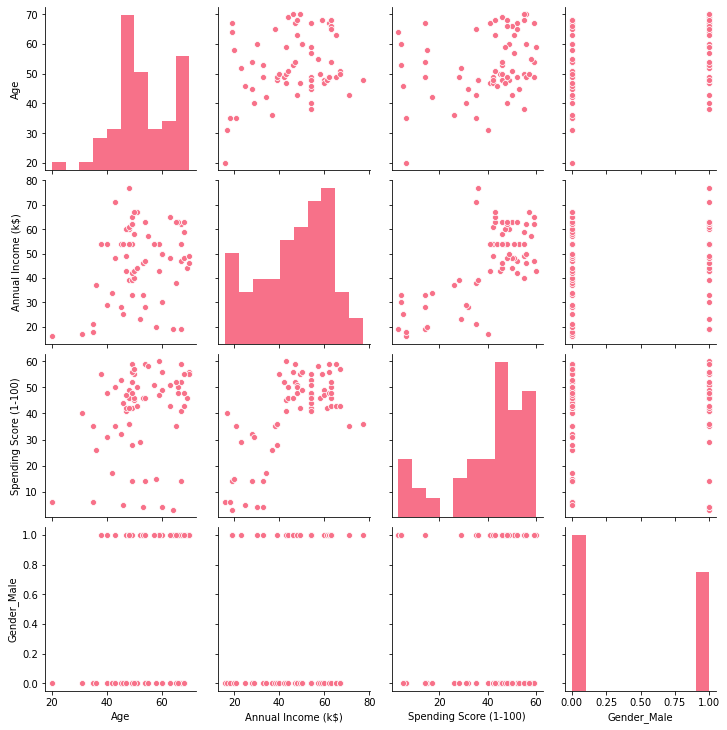

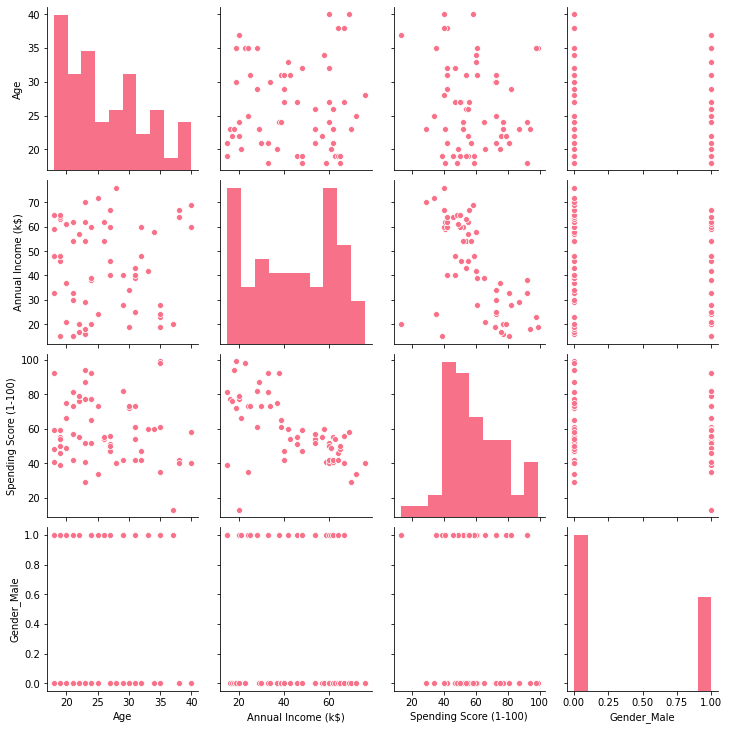

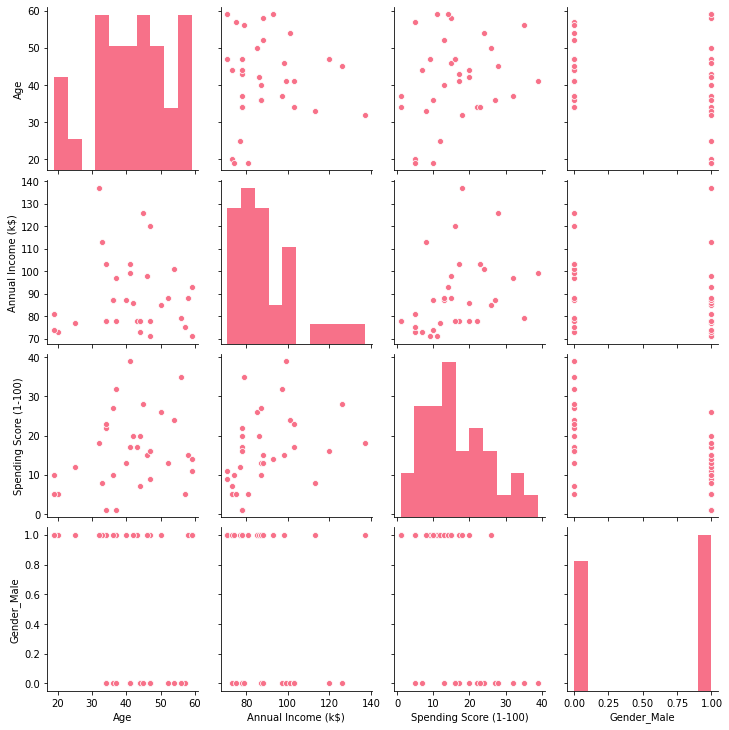

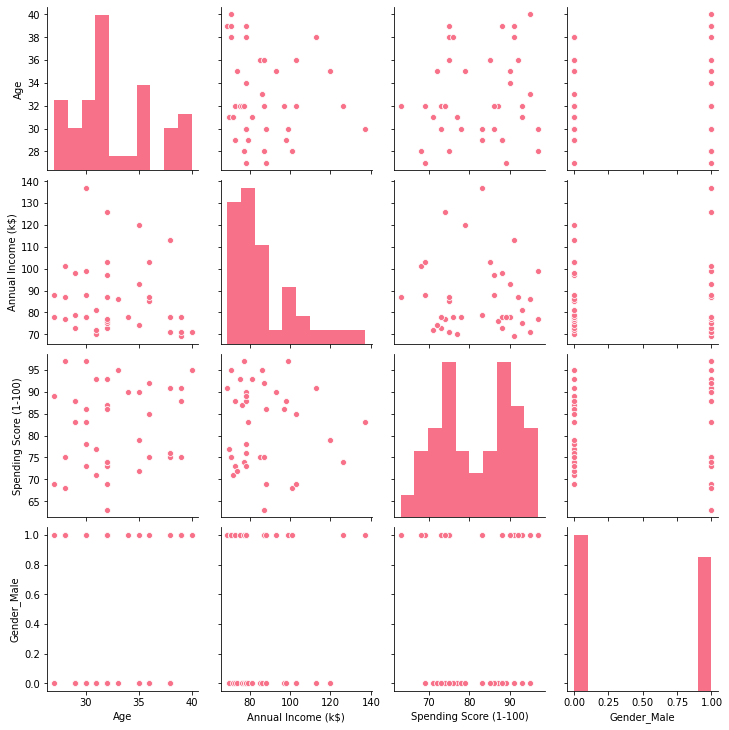

In [54]:
for i in np.unique(data['HierarichalClustering']):
  sns.pairplot(data[data['HierarichalClustering']==i].drop(['HierarichalClustering','KNN','DBSCAN'],axis=1))

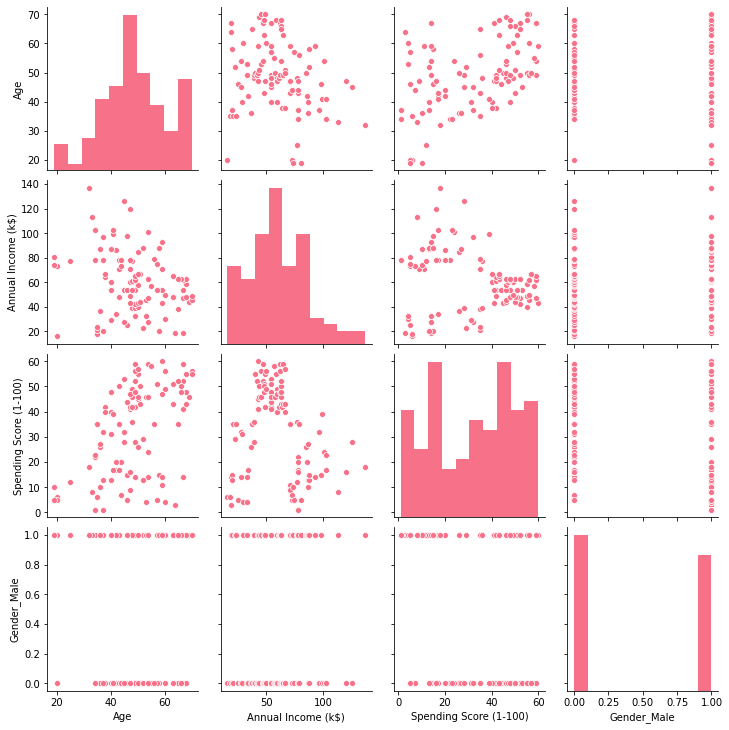

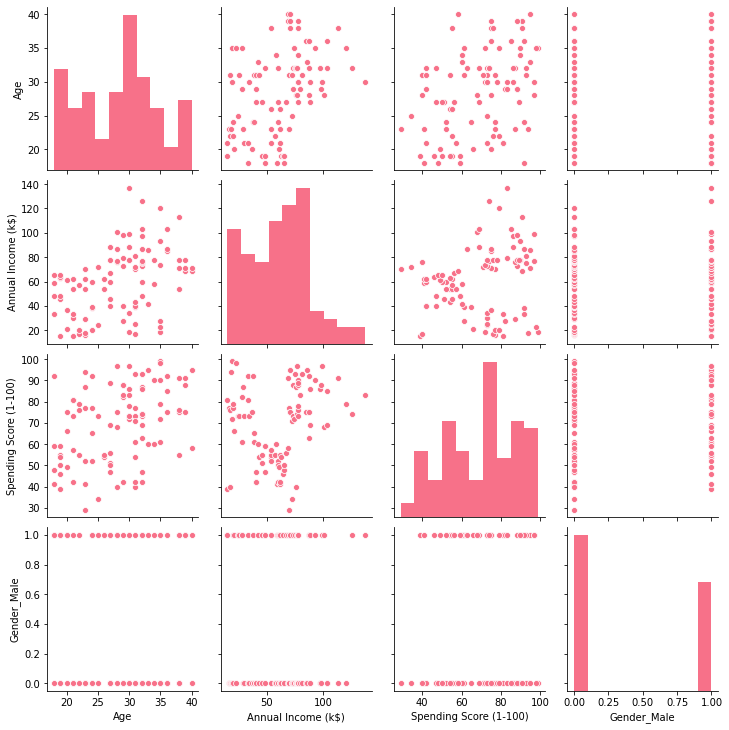

In [55]:
for i in np.unique(data['KNN']):
  sns.pairplot(data[data['KNN']==i].drop(['KNN','HierarichalClustering','DBSCAN'],axis=1))

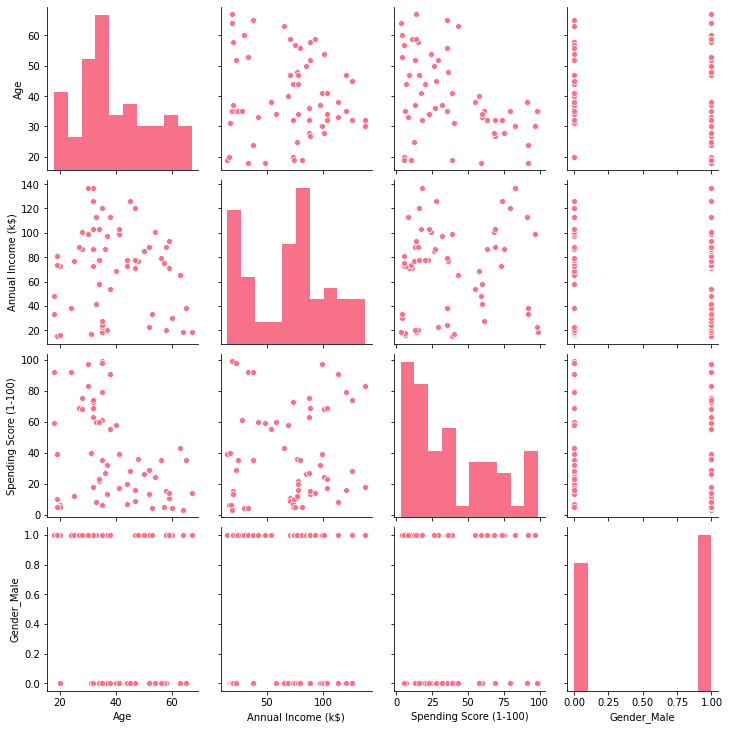

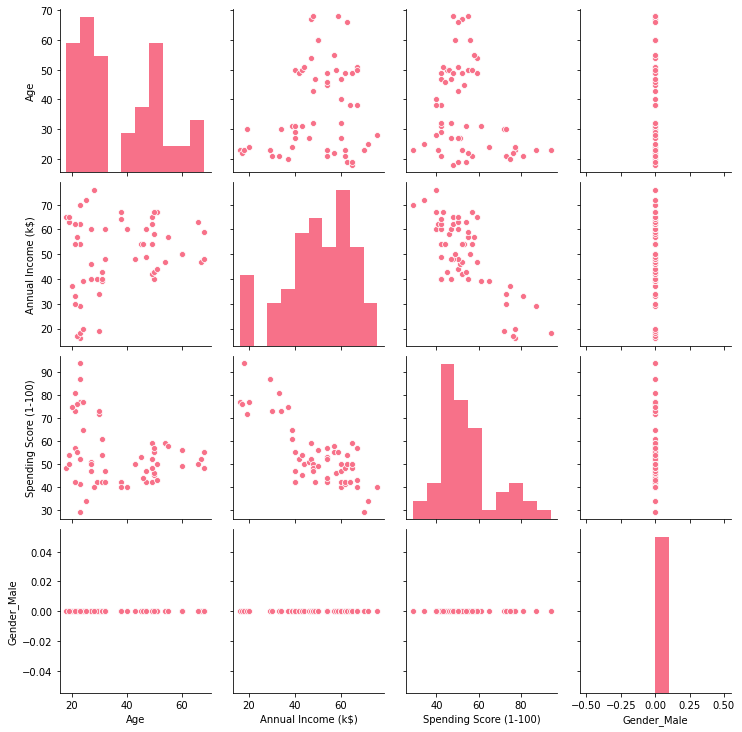

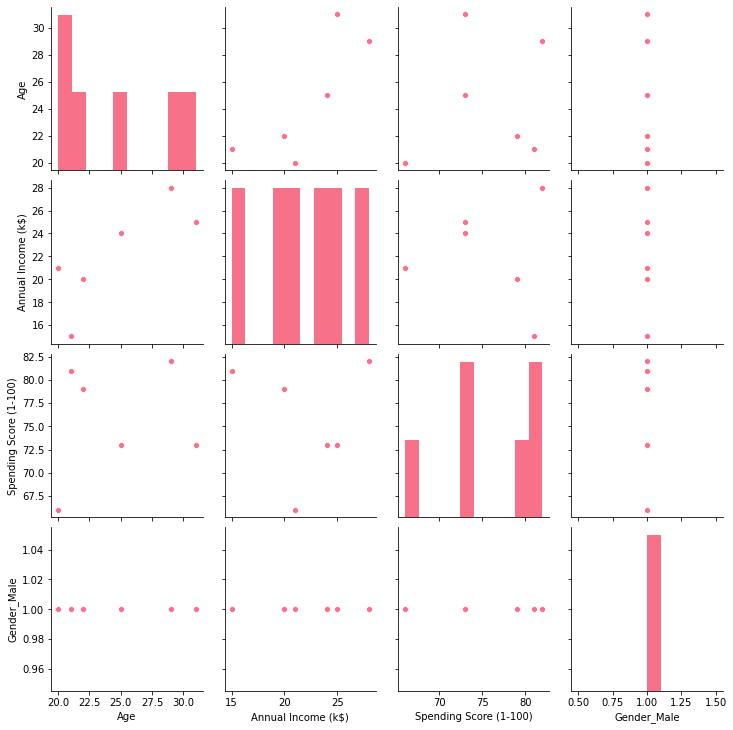

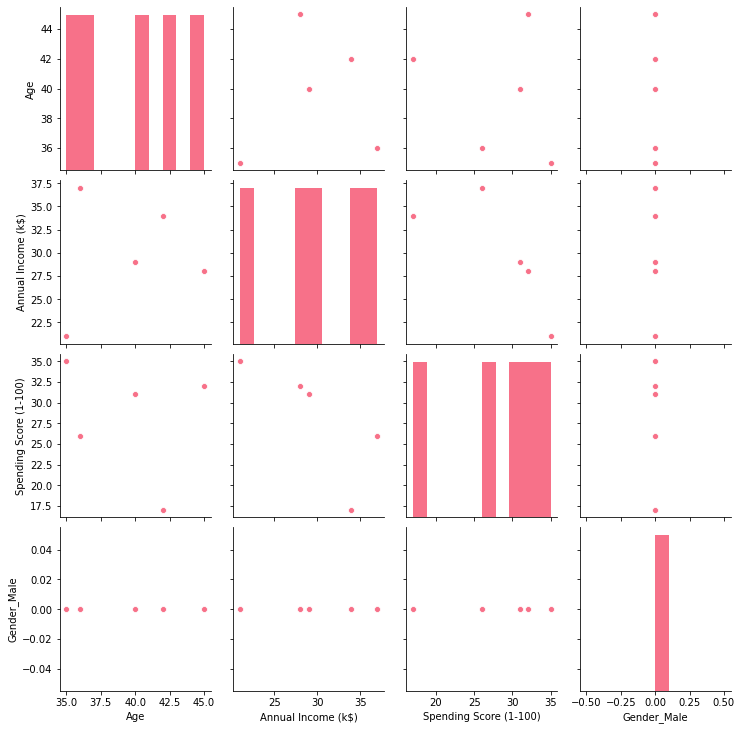

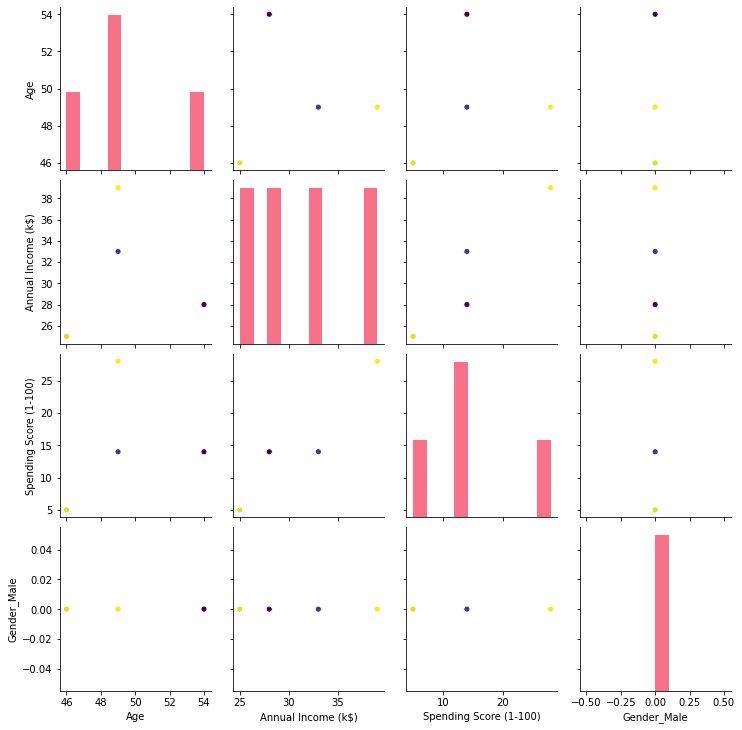

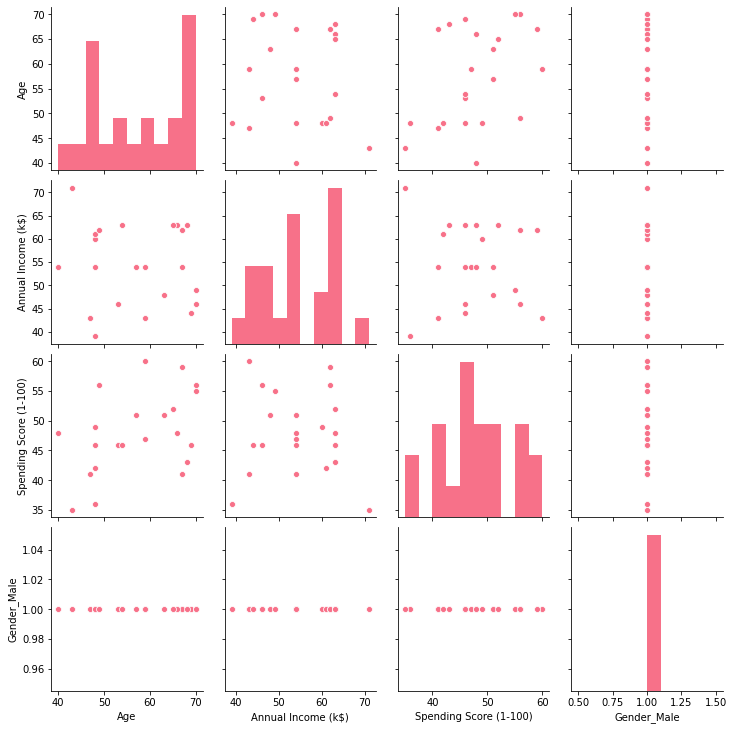

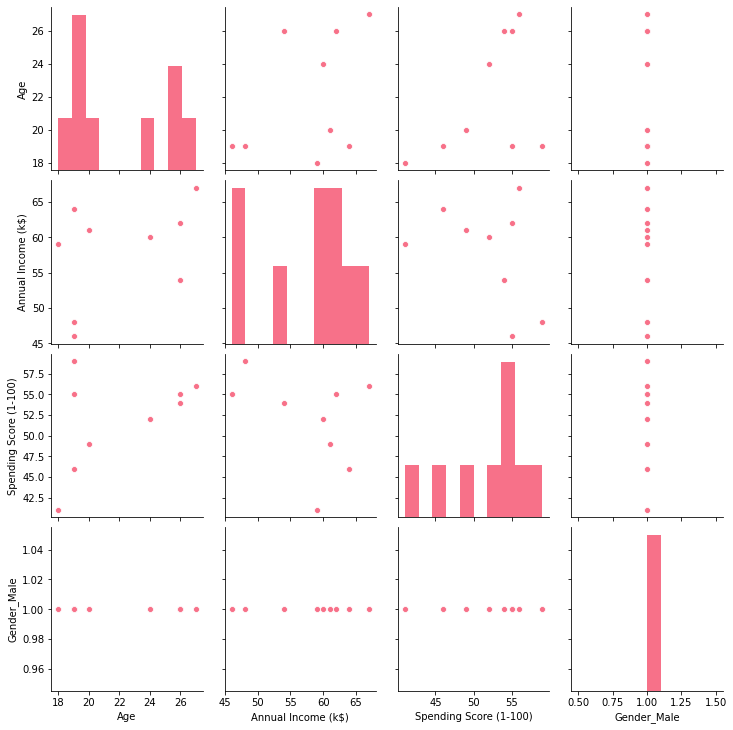

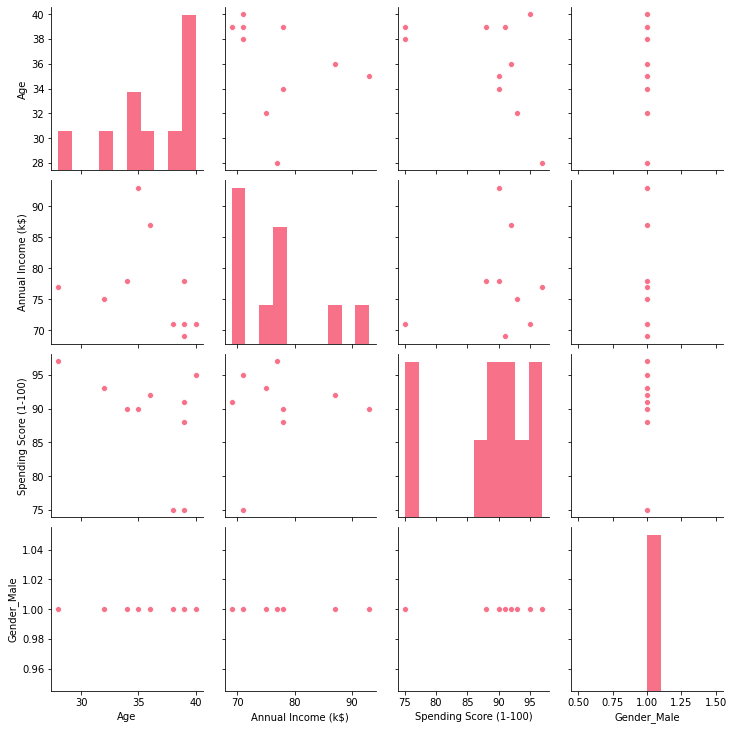

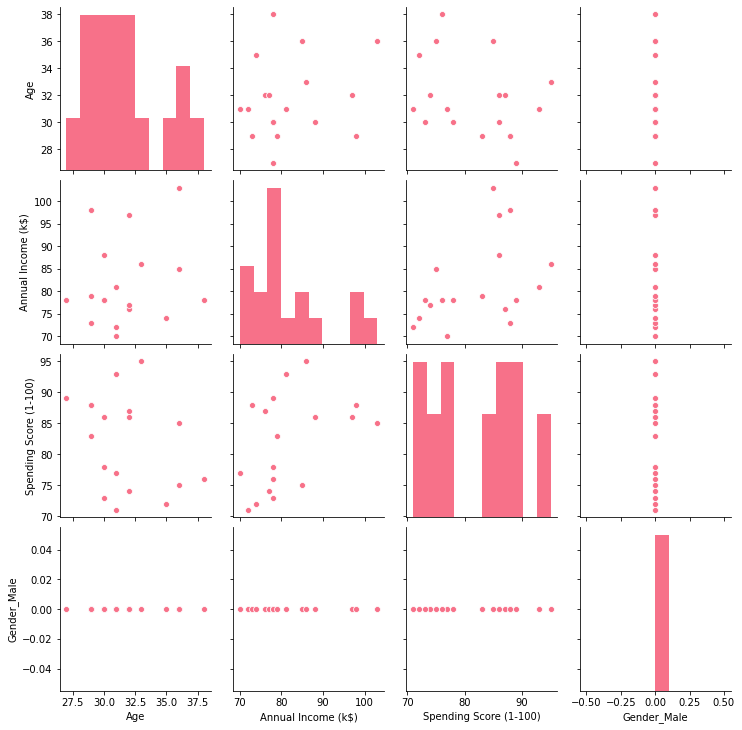

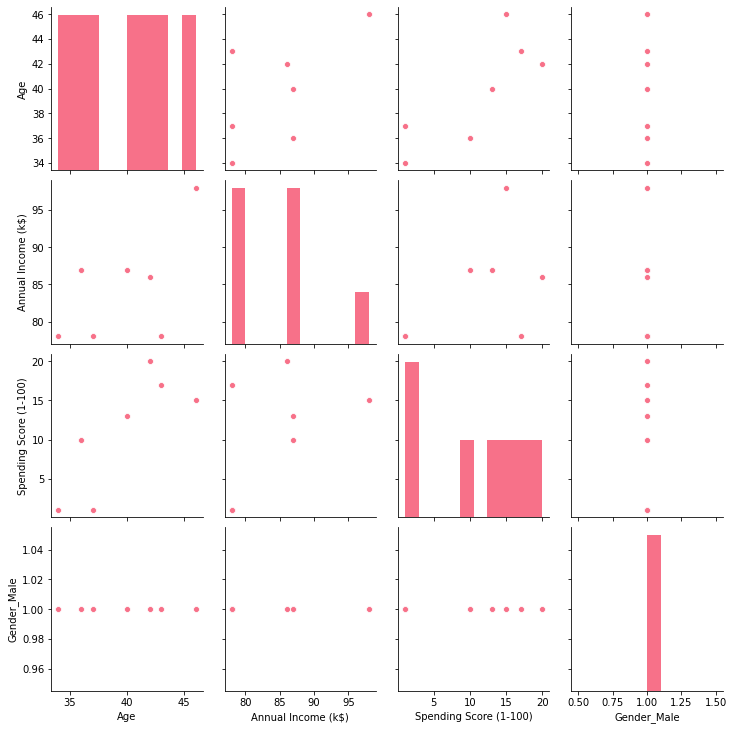

In [56]:
for i in np.unique(data['DBSCAN']):
  sns.pairplot(data[data['DBSCAN']==i].drop(['DBSCAN','KNN','HierarichalClustering'],axis=1))

We can further study the distribution with respect to different clusters so formed out of different clustering methods to study more qualititively effectiveness of clustering.